In [1]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import sentiment_mod as s

#consumer key, consumer secret, access token, access secret.
ckey="################"
csecret="'###########################################"
atoken="#########################################"
asecret="######################################"



class listener(StreamListener):

    def on_data(self, data):

        all_data = json.loads(data)

        tweet = all_data["text"]
        sentiment_value, confidence = s.sentiment(tweet)
        print(tweet, sentiment_value, confidence)

        if confidence*100 >= 80:
            output = open("twitter-out.txt","a")
            output.write(sentiment_value)
            output.write('\n')
            output.close()

        return True

    def on_error(self, status):
        print(status)

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["happy"])

16000
RT @ultsehuntrash: happy birthday @exoxempathy 💖💖 pos 1.0
RT @Patriciamae77: @BTS_twt Thank you so much for all you do and for helping me to make my moms birthday a special one to remember. I surpr… pos 1.0
RT @KSRILAKSHMI4: @Jayeeta06 @ashikajaniya29 @sairajabeen25 @Anita22046Anita @Parvathy_10 @StefanSubotic91 @kaamna_sharma @AnanyajadhavAnu… pos 1.0
@HardikPatel_ @RahulGandhi @vijayrupanibjp @BJP4India @ChaudhryShankar @BhupendraSinh1 @AmitChavdaINC… https://t.co/u8mon5RdCB pos 1.0
RT @kimtaem: SHINee’s Cashbee cards are all group cards. ;; Every other group got individual + groups cards. I don’t know why I’m so happy… pos 1.0
RT @ClarkJamesYNWA: Net spend since 2014/15:

Man City - £569m
Man Utd - £503m
Arsenal - £264m
#LFC - £178m

Keep telling yourself Liverpoo… neg 1.0
RT @wandazrin: Semoga murah rezeki kamu lagi Ilyanaa. Tersenyum saya melihat keindahan akhlak kamu. Sungguh, akhlak itu bukan paparan mata… pos 1.0
RT @OscarMbo: 8 minutes until her birthday ends &amp; she j

@underscoregeoff Congratulations Geoff!! Your daughter is beautiful and so sweet! Your life was beautiful before wi… https://t.co/gRAvMwd4aQ pos 1.0
Nothing makes me more happy than being nice to our neighbor who is a bitch to us all, doesn't greet and doesn't sho… https://t.co/N8lTMu6NYX pos 1.0
RT @TeamMarNigoLGN: I'M HAPPY THAT OTHER HUMAN BEINGS RECOGNIZED THEM AS MAMAMEH AND PAPAPEH 

#POPSSSSTrending pos 1.0
RT @choiisooyyoung: FULL SCALE PROMOTIONS MY ASS https://t.co/VebhWfKau5 pos 1.0
RT @_bybuku: how is august next week?! 

september is basically tomorrow. 

it’s already 2019. 

happy new year. pos 1.0
RT @NationCymru: The Welsh Government is happy to make us a dumping ground for England’s nuclear waste | Tim Richards https://t.co/pJuXUZsA… pos 1.0
RT @GerHogan: Happy #tuesnews @RNAtweets - good news to share this week is that #secretswekeep is currently in @easons on #summer #sale #of… pos 1.0
i’m so happy for The Boyz 💗they really do deserve the rookie of the year award. th

RT @horstiefm: Since i know The Diva @FetishVanessa, since i saw Her toes - i'm happy to be a foot slave! i wanna be Her foot slut forever!… neg 1.0
@SaffronBarker HAPPY BIRTHDAY! I love you lots xx me and @Emsie1902 loved meeting you back in April 💕 https://t.co/Q4z0qSM6H1 pos 1.0
#phd chat. now tell them what you said to your examiners afterwards at lunch? 😆 https://t.co/iOhYRcL1C4 pos 1.0
RT @daisy_willcox: I couldn’t care less if a boy wore a moncler top or wore a £2 t shirt from primark. I couldn’t care about how much money… neg 1.0
@yokooo07 Happy Birthday 🎈 pos 1.0
#Today "Most of us are just about as happy as we make up our minds to be." William Adams pos 1.0
happy birthday dudeeeee @Jacobleeperez3 :)!! pos 1.0


ProtocolError: ('Connection broken: IncompleteRead(0 bytes read)', IncompleteRead(0 bytes read))

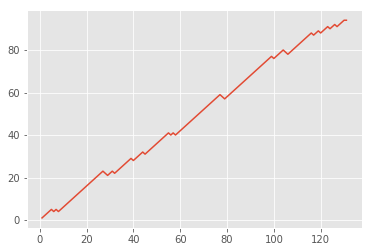

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time
%matplotlib inline

style.use("ggplot")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out.txt","r").read()
    lines = pullData.split('\n')

    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines[-200:]:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1

        xar.append(x)
        yar.append(y)
        
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)